# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [9]:
data = df[['posse_de_imovel', 'posse_de_veiculo', 'renda']]
data.head()

,posse_de_imovel,posse_de_veiculo,renda
0,True,False,3369.24
1,True,True,6096.14
2,True,True,5658.98
3,False,True,7246.69
4,False,False,4017.37


In [39]:
# Separar os dados de acordo com a posse de veículo e imóvel
renda_veiculo_sim = df[df['posse_de_veiculo'] == True]['renda']
renda_veiculo_nao = df[df['posse_de_veiculo'] == False]['renda']

renda_imovel_sim = df[df['posse_de_imovel'] == True]['renda']
renda_imovel_nao = df[df['posse_de_imovel'] == False]['renda']

# Realizar o teste t para posse de veículo
ttest_veiculo = ttest_ind(renda_veiculo_sim, renda_veiculo_nao, equal_var=False)

# Realizar o teste t para posse de imóvel
ttest_imovel = ttest_ind(renda_imovel_sim, renda_imovel_nao, equal_var=False)

print("Teste t para posse de veículo:")
print(f"Estatística para o teste: {ttest_veiculo.statistic:.4f}, p-valor: {ttest_veiculo.pvalue:}")

print("\nTeste t para posse de imóvel:")
print(f"Estatística para o teste: {ttest_imovel.statistic:.4f}, p-valor: {ttest_imovel.pvalue:}")


Teste t para posse de veículo:
Estatística para o teste: 7.7123, p-valor: 1.3324346963629966e-14

Teste t para posse de imóvel:
Estatística para o teste: 3.6776, p-valor: 0.00023665092205816239


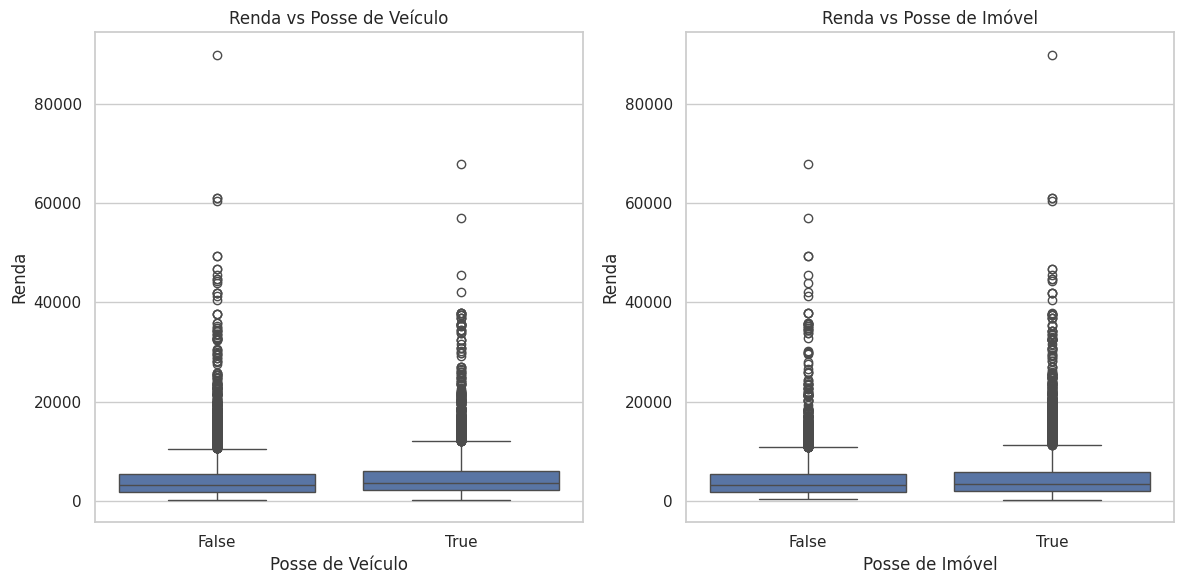

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='posse_de_veiculo', y='renda', data=df)
plt.title('Renda vs Posse de Veículo')
plt.xlabel('Posse de Veículo')
plt.ylabel('Renda')

plt.subplot(1, 2, 2)
sns.boxplot(x='posse_de_imovel', y='renda', data=df)
plt.title('Renda vs Posse de Imóvel')
plt.xlabel('Posse de Imóvel')
plt.ylabel('Renda')
plt.tight_layout()
plt.show()


Posse de Veículo:
Estatística do teste t: 7.71

p-valor: 1.33e-14 (bem menor que 0.05)

Isso significa **que há uma** diferença significativa na renda entre quem possui e quem não possui veículo. Parece que possuir um veículo é um ótimo indicador de renda.

Posse de Imóvel:
Estatística do teste t: 3.68

p-valor: 0.00024 (também menor que 0.05)

A posse de imóvel também apresenta uma diferença estatisticamente significativa na renda, **mas não é tão intensa** quanto a diferença observada com a posse de veículo.

Então, ambas as variáveis são bons preditores de renda, com a posse de veículo sendo um preditor mais forte.